<a href="https://colab.research.google.com/github/nandasbl/pariwisata/blob/main/Pariwisata%20pulau%20seribu%20januari-juni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import itertools
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

plt.style.use('bmh'); sns.set()

In [47]:
Pn = pd.read_csv('https://raw.githubusercontent.com/nandasbl/pariwisata/main/data-penumpang-kapal-bulan-januari-juni%202020.csv', sep=',')
Pn

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,1/1/2020,MUARA ANGKE,13,23,549,3989
1,1/2/2020,MUARA ANGKE,15,13,831,1374
2,1/3/2020,MUARA ANGKE,11,12,921,800
3,1/4/2020,MUARA ANGKE,17,7,1838,551
4,1/5/2020,MUARA ANGKE,7,15,600,1768
...,...,...,...,...,...,...
1816,6/26/2020,SABIRA,1,1,8,8
1817,6/27/2020,SABIRA,0,1,0,12
1818,6/28/2020,SABIRA,1,0,12,0
1819,6/29/2020,SABIRA,1,2,0,23


In [48]:
Pn.head()

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,1/1/2020,MUARA ANGKE,13,23,549,3989
1,1/2/2020,MUARA ANGKE,15,13,831,1374
2,1/3/2020,MUARA ANGKE,11,12,921,800
3,1/4/2020,MUARA ANGKE,17,7,1838,551
4,1/5/2020,MUARA ANGKE,7,15,600,1768


In [49]:
Pn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tanggal          1821 non-null   object
 1   pelabuhan        1821 non-null   object
 2   kapal_berangkat  1821 non-null   int64 
 3   kapal_tiba       1821 non-null   int64 
 4   penumpang_naik   1821 non-null   int64 
 5   penumpang_turun  1821 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 85.5+ KB


In [50]:
print(Pn.shape)
Pn.duplicated().sum()

(1821, 6)


2

In [51]:
Pn.drop_duplicates(inplace=True)
print(Pn.duplicated().sum()) # no more duplicates
print(Pn.shape) # re-check by printing data size

0
(1819, 6)


In [52]:
Pn['tanggal'] = Pn['tanggal'].astype('datetime64[ns]')
Pn.dtypes

tanggal            datetime64[ns]
pelabuhan                  object
kapal_berangkat             int64
kapal_tiba                  int64
penumpang_naik              int64
penumpang_turun             int64
dtype: object

In [53]:
Pn.describe()

,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
count,1819.000000,1819.000000,1819.000000,1819.000000
mean,2.953821,3.003299,81.726223,80.573392
std,3.251649,3.444993,193.149021,202.683223
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,18.000000,17.000000
75%,4.000000,4.000000,86.500000,90.000000
max,42.000000,53.000000,2785.000000,3989.000000


In [54]:
# Remove columns which are not required in predictions

cols = ['pelabuhan','kapal_berangkat','kapal_tiba','penumpang_turun']
Pn.drop(cols, axis = 1, inplace = True)
Pn.head()

,tanggal,penumpang_naik
0,2020-01-01,549
1,2020-01-02,831
2,2020-01-03,921
3,2020-01-04,1838
4,2020-01-05,600


In [55]:
# Sort the Order Date 
Pn = Pn.sort_values('tanggal')

#print the sorted values
print(Pn.head(1))

#check any missing values
Pn.isnull().sum()

     tanggal  penumpang_naik
0 2020-01-01             549


tanggal           0
penumpang_naik    0
dtype: int64

In [56]:
# grouping sales according to Order Date
Pn.groupby('tanggal')['penumpang_naik'].sum().reset_index()

# min and max values of Order Date
print(Pn['tanggal'].min())
print(Pn['tanggal'].max())

2020-01-01 00:00:00
2020-06-30 00:00:00


In [57]:
import datetime

In [58]:
 import datetime
date = datetime.date.today()
date

datetime.date(2020, 12, 9)

In [59]:
#set 'tanggal' as index
Pn = Pn.set_index('tanggal')
Pn.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30'],
              dtype='datetime64[ns]', name='tanggal', length=1819, freq=None)

In [60]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = Pn['penumpang_naik'].resample('MS').mean()
y['2020':]

tanggal
2020-01-01    156.607670
2020-02-01    171.927586
2020-03-01     87.206452
2020-04-01      6.455556
2020-05-01      4.087097
2020-06-01     52.223333
Freq: MS, Name: penumpang_naik, dtype: float64

# **Data Visualisation**

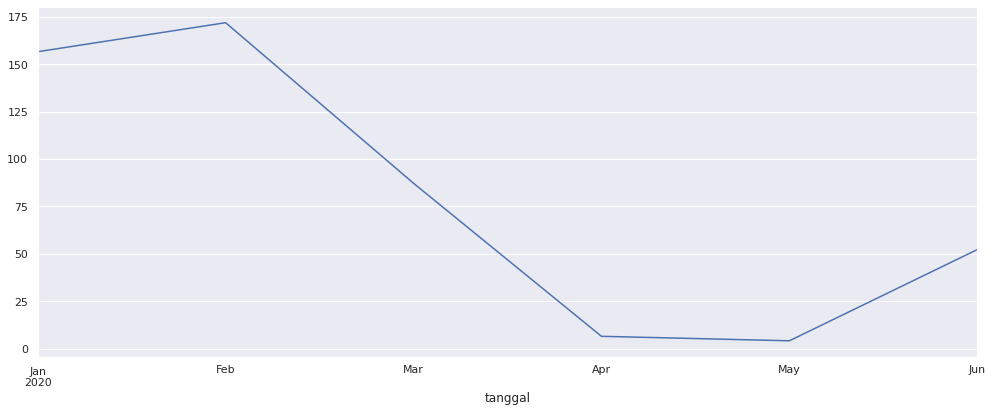

In [63]:
y.plot(figsize = (15, 6))
plt.show()

In [66]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [67]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:74.72096560439174
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:71.7227119411977
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:56.62321631778657
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:56.4920800528187
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:70.58269290230554
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:69.83464599295296
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:58.00331746184261
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:59.535462592575705


In [68]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

ValueError: ignored